<a href="https://colab.research.google.com/github/raghu5465/Codsoft_Internship/blob/main/Car_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Sales Prediction using ANN

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [31]:
path = "/content/drive/MyDrive/car_purchasing.csv"

In [32]:
df= pd.read_csv(path,encoding='latin-1')

In [33]:
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [34]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [35]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

Scaling data

In [36]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

Splitting the data into training and testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


#Model Structure

In [38]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training the Model

In [39]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 0.4580 - mean_absolute_error: 0.6509 - val_loss: 0.3850 - val_mean_absolute_error: 0.5921
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2917 - mean_absolute_error: 0.5110 - val_loss: 0.2295 - val_mean_absolute_error: 0.4486
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1638 - mean_absolute_error: 0.3741 - val_loss: 0.1225 - val_mean_absolute_error: 0.3152
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.2526 - val_loss: 0.0583 - val_mean_absolute_error: 0.2040
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.1600 - val_loss: 0.0271 - val_mean_absolute_error: 0.1287
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.1091 - val_loss: 0.0160 - val_mean_absolute_error: 0.1026
Epoch 7/50
10/10 [=========

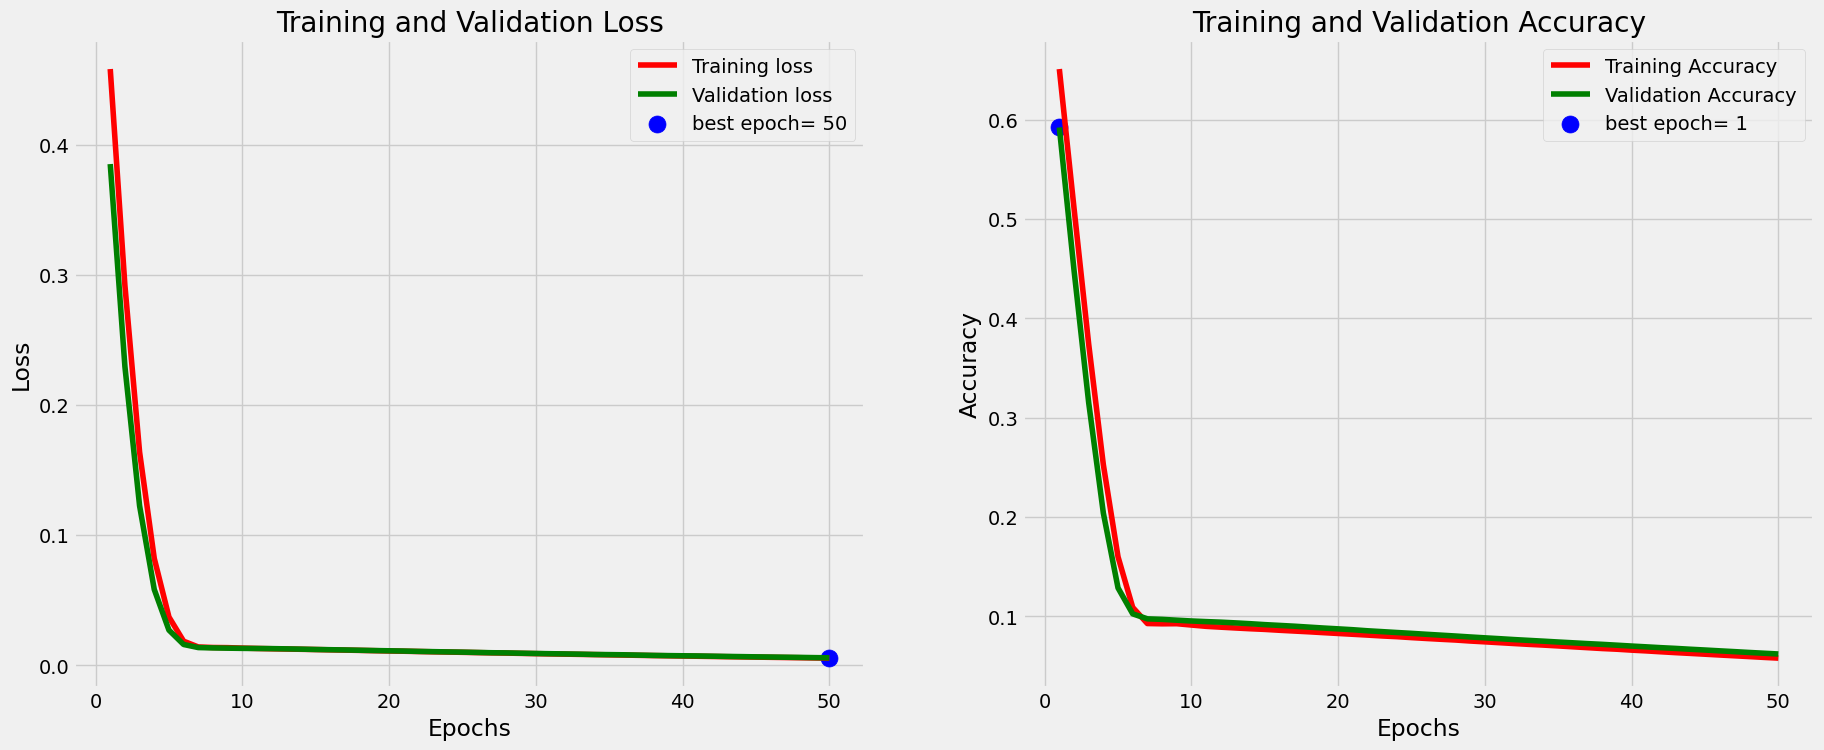

In [40]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

#Prediction

In [41]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [42]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.7619174269849084
